<a href="https://colab.research.google.com/github/joshuadollison/MAT421/blob/main/MAT421_16133_HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 7**
Joshua Dollison

MAT421-16133

3/2/2025


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **1: Numerical Differentiation Problem Statement**

The class text points out that many engineering and science systems change over time, space, and many other dimensions of interest. In mathematics, function derivatives are often used to model these changes. However, in practice the function may not be explicitly known, or the function may be implicitly represented by a set of data points. In these cases and others, it may be desirable to compute derivatives numerically rather than analytically.

It goes on to say that in Python, a function $f(x)$ can be represented over an interval by computing its value on a grid. Although the function itself may be continuous, this discrete or discretized representation is useful for numerical calculations and corresponds to data sets that may be acquired in engineering and science practice. Whether $f$ is an analytic function or a discrete representation of one, we would like to derive methods of approximating the derivative of $f$ over a numerical grid and determine their accuracy.

### **Example 1.1**

The first example introduces the idea of a numerical grid. In practice, many functions are not available in closed form but are sampled at discrete points. Here, we generate a grid for the function $f(x)=\text{sin}(x)$ and plot its discrete samples to demonstrate the numerical representation of a continuous function.

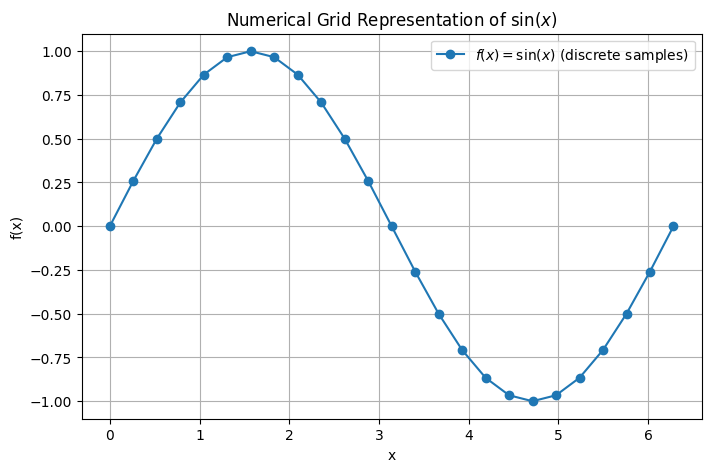

In [2]:
# Define the continuous function
def f(x):
    return np.sin(x)

# Create a numerical grid over the interval [0, 2π] with a specified step size
x_values = np.linspace(0, 2*np.pi, 25)  # 25 evenly spaced points
y_values = f(x_values)

# Plot the discrete samples
plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, 'o-', label='$f(x)=\\sin(x)$ (discrete samples)')
plt.title('Numerical Grid Representation of $\\sin(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


### **Example 1.2**

In this GPT inspired real-world application, sensor data (e.g., temperature readings over time) are available only at discrete times. This example simulates noisy temperature data (using a sinusoidal diurnal cycle) on a numerical grid. The discrete dataset represents the problem statement behind numerical differentiation when the underlying continuous function is not directly known.

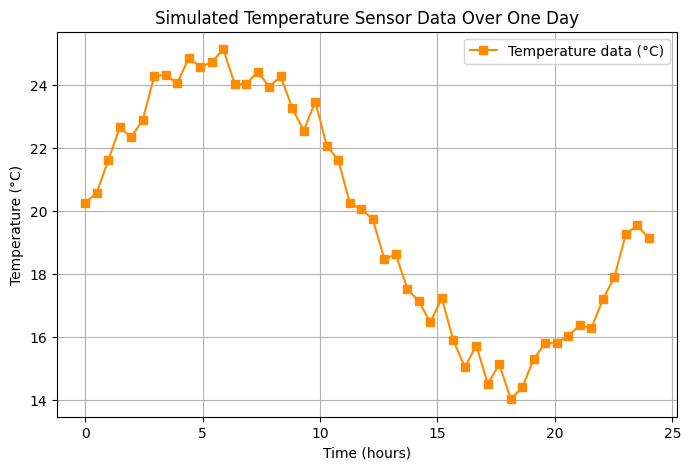

In [3]:
# Simulate time (in hours) over one day
time = np.linspace(0, 24, 50)  # 50 data points over 24 hours

# Simulate temperature data with a diurnal pattern plus some noise
# Base temperature: 20°C with a sinusoidal fluctuation of ±5°C
temperature = 20 + 5 * np.sin((2 * np.pi / 24) * time) + np.random.normal(0, 0.5, time.shape)

# For reproducibility
np.random.seed(42)

# Simulated sensor data (Example 1.2):
# Time in hours over one day
time = np.linspace(0, 24, 50)
# Simulated temperature (°C): Base temperature 20°C with ±5°C sinusoidal variation plus noise
temperature = 20 + 5 * np.sin((2 * np.pi / 24) * time) + np.random.normal(0, 0.5, time.shape)

# Plot the simulated sensor data
plt.figure(figsize=(8, 5))
plt.plot(time, temperature, 's-', color='darkorange', label='Temperature data (°C)')
plt.title('Simulated Temperature Sensor Data Over One Day')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


# **2: Finite Difference Approximating Derivatives**

The class text states that the derivative of a function at the point is defined as: $f'(x)$ of a function $f(x)$ at the point $x = a$ is defined as:

\begin{align}
  f'(a) = \lim\limits_{x \to a} \frac{f(x)-f(a)}{x-a}
\end{align}


The derivative at x = a is the slope at this point. In fnite difference approximations of this slope, we can use values of the function in the neighborhood of the point $x = a$ to achieve the goal. There are various finite
difference formulas used in different applications, and three of these, where the derivative is calculated using the values of two points, are:

*   Forward difference - estimating the slope of the function at $x_j$ using the line that connects $(x_j, f(x_j))$ and $(x_{j+1}, f(x_{j+1}))$
*   Backward difference - estimating the slope of the function at $x_j$ using the line that connects $(x_{j-1}, f(x_{j-1}))$ and $(x_j, f(x_j))$
*   Central difference - estimating the slope of the function at $x_j$ using the line that connects $(x_{j-1}, f(x_{j-1}))$ and $(x_{j+1}, f(x_{j+1}))$

Leading us to apply the Taylor Series.


### **Example 2.1**

This example demonstrates the finite difference method for approximating the first derivative. Using the forward difference formula, the derivative of $f(x)=\text{cos}(x)$ is approximated on a grid. The numerical derivative is compared to the analytical derivative $f'(x)=-sin(x)$ and both curves are plotted.


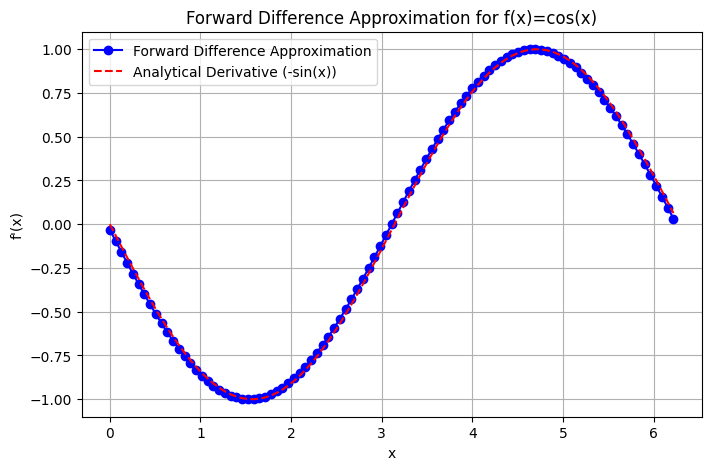

In [4]:
# Define the function and its true derivative
def f(x):
    return np.cos(x)

def true_derivative(x):
    return -np.sin(x)

# Create a grid and compute function values
x = np.linspace(0, 2*np.pi, 100)
y = f(x)
h = x[1] - x[0]

# Compute forward difference derivative approximation
# Note: np.diff returns an array of differences of length len(x)-1
numerical_derivative = np.diff(y) / h

# Adjust x-values for the derivative (midpoints or simply exclude the last point)
x_deriv = x[:-1]

# Plot both the numerical derivative and the analytical derivative
plt.figure(figsize=(8, 5))
plt.plot(x_deriv, numerical_derivative, 'bo-', label='Forward Difference Approximation')
plt.plot(x_deriv, true_derivative(x_deriv), 'r--', label='Analytical Derivative (-sin(x))')
plt.title('Forward Difference Approximation for f(x)=cos(x)')
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)
plt.show()


### **Example 2.2**

In this GPT inspired real-world example we simulate position data for a moving object (e.g., a car) following a quadratic model with added realism. The forward difference method is used to approximate the velocity (the first derivative of position). Both the numerical derivative and the exact velocity (derived analytically from the quadratic equation) are plotted.

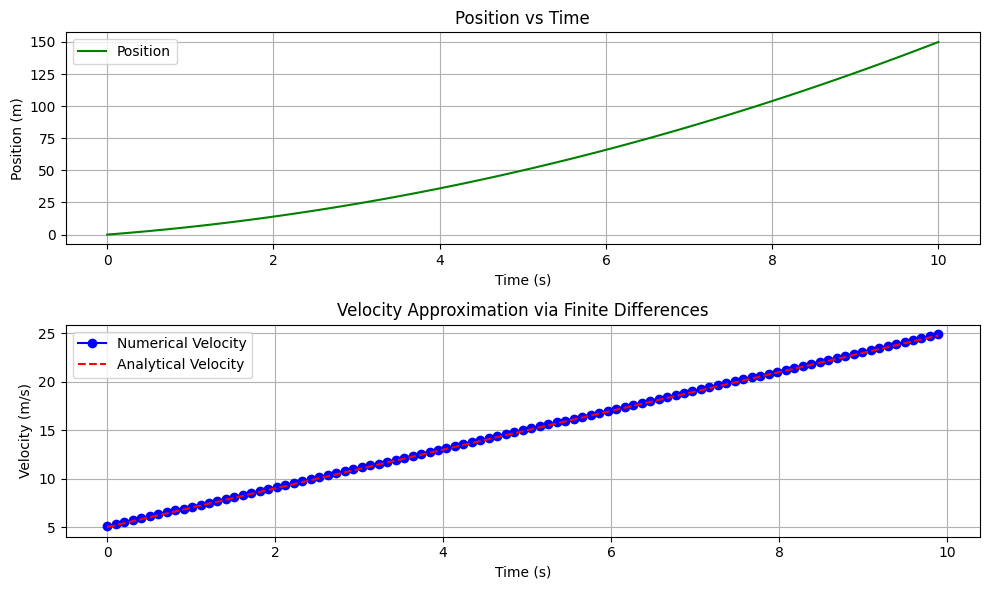

In [5]:
# Simulate position data for a car with constant acceleration
# Let position be given by: x(t) = 0.5 * a * t^2 + v0 * t + x0
a = 2.0        # acceleration in m/s^2
v0 = 5.0       # initial velocity in m/s
x0 = 0.0       # initial position in m
t = np.linspace(0, 10, 100)  # time from 0 to 10 seconds

# Position function and its analytical derivative (velocity)
position = 0.5 * a * t**2 + v0 * t + x0
def true_velocity(t):
    return a * t + v0

# Compute the numerical derivative using forward difference
h = t[1] - t[0]
numerical_velocity = np.diff(position) / h
t_velocity = t[:-1]  # corresponding time points for the derivative

# Plot the position, numerical velocity, and analytical velocity
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, position, 'g-', label='Position')
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t_velocity, numerical_velocity, 'bo-', label='Numerical Velocity')
plt.plot(t_velocity, true_velocity(t_velocity), 'r--', label='Analytical Velocity')
plt.title('Velocity Approximation via Finite Differences')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# **3: Approximating of Higher Order Derivatives**

The class text states that it is also possible to use Taylor series to approximate higher order derivatives (e.g., $f''(x_j), f'''(x_j)$ etc.).  The approach is based on Taylor series expansions, which allow us to express a function's value at nearby points in terms of its derivatives at a central point. By combining these expansions—for instance, at $x+h$ and $x-h$- one can eliminate lower-order terms to derive formulas for higher order derivatives.



### **Example 3.1**
This example demonstrates how to approximate the second derivative of a function using the central difference formula. We use $f(x)=\text{sin}(x)$ whose second derivative is $-\text{sin}(x)$. The code calculates the numerical second derivative and compares it with the analytical result, plotting both for visual inspection.

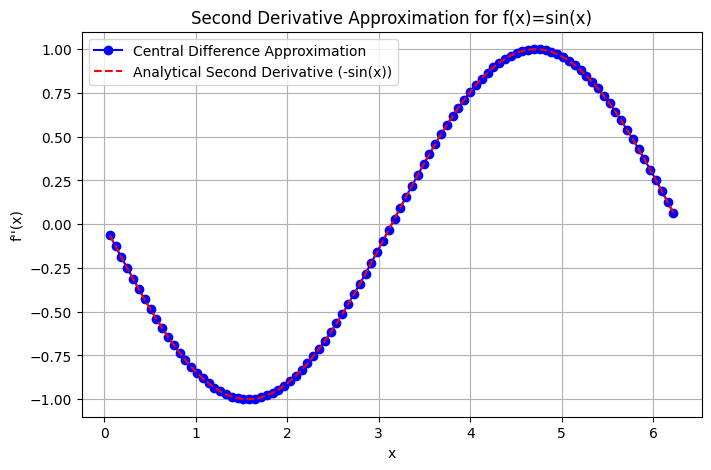

In [6]:
# Define the function and its true second derivative
def f(x):
    return np.sin(x)

def true_second_derivative(x):
    return -np.sin(x)

# Create a grid
x = np.linspace(0, 2*np.pi, 100)
h = x[1] - x[0]

# Compute the second derivative using the central difference formula:
# f''(x) ≈ (f(x+h) - 2*f(x) + f(x-h)) / h^2
second_deriv_numerical = (f(x[2:]) - 2*f(x[1:-1]) + f(x[:-2])) / (h**2)
x_center = x[1:-1]  # adjusted x values for the second derivative

# Plot the numerical second derivative and the true second derivative
plt.figure(figsize=(8, 5))
plt.plot(x_center, second_deriv_numerical, 'bo-', label='Central Difference Approximation')
plt.plot(x_center, true_second_derivative(x_center), 'r--', label='Analytical Second Derivative (-sin(x))')
plt.title('Second Derivative Approximation for f(x)=sin(x)')
plt.xlabel('x')
plt.ylabel("f''(x)")
plt.legend()
plt.grid(True)
plt.show()


### **Example 3.2**

In many real-world applications, the second derivative of position (acceleration) is of interest. This GPT inspired example simulates a vehicle's position using a function with oscillatory behavior to mimic, for instance, the vibrations of a car. We use a damped oscillatory function $x(t)=e^{−0.1t}\text{cos}(2t)$ and compute its numerical second derivative (acceleration) using the central difference formula. The numerical acceleration is then compared with the analytical acceleration (derived symbolically) and both are plotted.

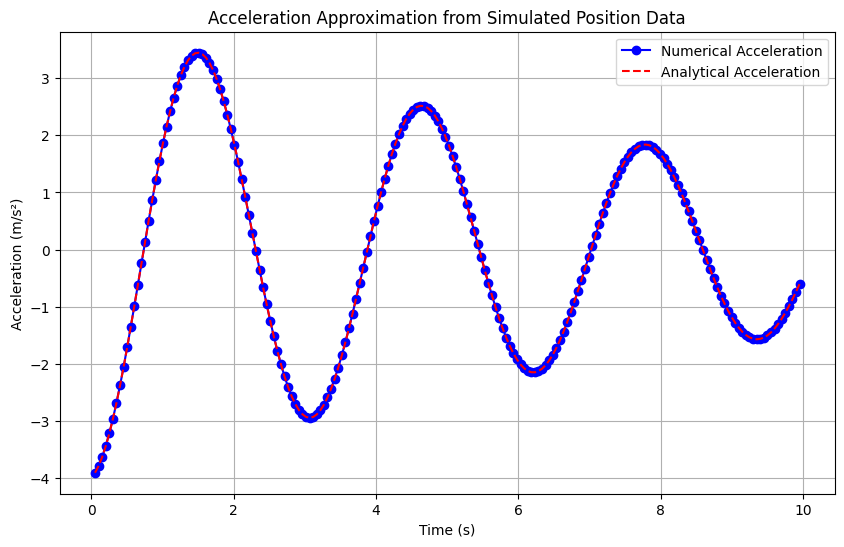

In [7]:
# Define the position function (damped oscillation) and its analytical second derivative.
# x(t) = exp(-0.1*t) * cos(2*t)
def position(t):
    return np.exp(-0.1*t) * np.cos(2*t)

# The analytical second derivative can be derived symbolically.
# For demonstration, assume we have derived (or computed) the following expression:
def true_acceleration(t):
    # This is the second derivative of x(t) = e^(-0.1*t)*cos(2*t)
    # Derived expression:
    return np.exp(-0.1*t) * (0.01 * np.cos(2*t) + 0.4 * np.sin(2*t) - 4 * np.cos(2*t))

# Create a time grid
t = np.linspace(0, 10, 200)
h = t[1] - t[0]
x_vals = position(t)

# Compute the second derivative using the central difference formula
accel_numerical = (x_vals[2:] - 2*x_vals[1:-1] + x_vals[:-2]) / (h**2)
t_center = t[1:-1]

# Plot the numerical acceleration and the analytical acceleration
plt.figure(figsize=(10, 6))
plt.plot(t_center, accel_numerical, 'bo-', label='Numerical Acceleration')
plt.plot(t_center, true_acceleration(t_center), 'r--', label='Analytical Acceleration')
plt.title('Acceleration Approximation from Simulated Position Data')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.legend()
plt.grid(True)
plt.show()
